<a href="https://colab.research.google.com/github/mrrkdas/LazyProgrammer-DeepLearning-Course/blob/main/CNN_with_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Input, Dropout, Flatten
import numpy as np

In [2]:
# Load Data
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


## Preprocessing

In [6]:
X_train = np.reshape(X_train, (60000, 28, 28, 1))
X_test = np.reshape(X_test, (10000, 28, 28, 1))

## Model

In [12]:
input = Input((28, 28, 1))

conv1 = Conv2D(32, (3,3), activation= 'relu') 
x = conv1(input) 
x = Conv2D(32, (3,3), activation = 'relu') (x)
x = Conv2D(64, (3,3), activation = 'relu') (x)
x = Flatten()(x)
x = Dropout(0.2) (x)
x = Dense(512, activation = 'relu') (x)

output = Dense(10, activation = 'softmax') (x)

model = tf.keras.models.Model(input, output)

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['sparse_categorical_accuracy'])

In [14]:
r = model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 545s 290ms/step - loss: 1.0044 - sparse_categorical_accuracy: 0.8287
Epoch 2/5
1875/1875 [==============================] - 505s 270ms/step - loss: 0.3036 - sparse_categorical_accuracy: 0.8859
Epoch 3/5
1875/1875 [==============================] - 507s 270ms/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9103
Epoch 4/5
1875/1875 [==============================] - 502s 268ms/step - loss: 0.1927 - sparse_categorical_accuracy: 0.9281
Epoch 5/5
1875/1875 [==============================] - 502s 268ms/step - loss: 0.1574 - sparse_categorical_accuracy: 0.9426


## After Model

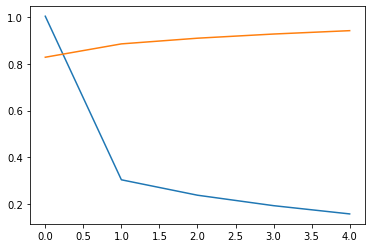

In [15]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['sparse_categorical_accuracy'])

In [16]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[889   2  21  16   3   2  65   0   2   0]
 [  4 957   2  27   4   0   5   0   1   0]
 [ 18   0 809   9  98   0  66   0   0   0]
 [ 22   1   7 912  33   0  24   0   1   0]
 [  1   0  69  32 837   0  61   0   0   0]
 [  0   0   0   1   0 974   0  15   0  10]
 [149   1  71  27  62   0 688   0   2   0]
 [  0   0   0   0   0  11   0 971   0  18]
 [  3   0   4   6   6   1  19   7 954   0]
 [  0   0   1   0   0  10   0  37   0 952]]


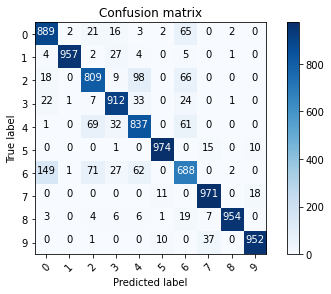

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

